# Lecture 03

In [156]:
import torch 
import torchvision 

from torch import nn 

from torch.utils.data import Dataset, DataLoader

from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt 

import random


#### Download data

In [157]:
train_data = datasets.FashionMNIST(
    root="Data",
    train=True,
    transform=ToTensor(),
    download=True
)

test_data = datasets.FashionMNIST(
    root="Data",
    train=False,
    transform=ToTensor(),
    download=True
)

#### Inspecting the data

60000
10000


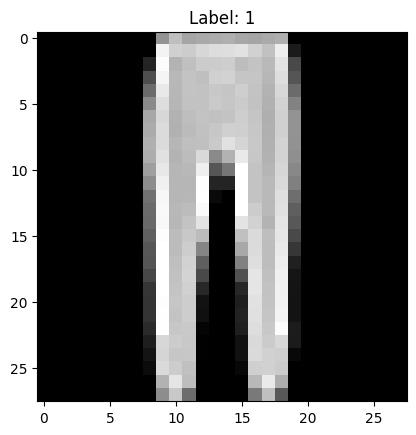

In [166]:
print(len(train_data))
print(len(test_data))

image, label = train_data[random.randint(1, 60000)]

plt.imshow(image.squeeze(), cmap="grey")
plt.title("Label: " + str(label))
plt.show()

#### Splitting the data into batches

In [159]:
train_data_batched = DataLoader(
    train_data,
    batch_size=32,
    shuffle=True
)

test_data_batched = DataLoader(
    test_data,
    batch_size=32,
    shuffle=False
)

In [186]:
image, label = next(iter(train_data_batched))
image.shape

torch.Size([32, 1, 28, 28])

#### Building the model 

In [161]:
class Model0(nn.Module):
    def __init__(self):
        super().__init__()
        self.sequential = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 10),
            nn.ReLU(),
            nn.Linear(10, 10),
            nn.ReLU(),
            nn.Linear(10, 10)
        )
    def forward(self, x):
        return self.sequential(x)

In [162]:
model0 = Model0()
lossFn = torch.nn.CrossEntropyLoss()
optimFn = torch.optim.SGD(model0.parameters(), lr=0.01)

In [163]:
model0.eval()
preds = model0(image)
preds_label = torch.argmax(preds, dim=1)

In [164]:
def accuracy_fn(y_pred, y_true):
    # y_pred are logits, shape (batch_size, num_classes)
    preds = torch.argmax(y_pred, dim=1)  # take class with max logit
    correct = (preds == y_true).sum().item()
    acc = correct / len(y_true)
    return acc

#### Training the model

In [153]:
epochs = 10

for epoch in range(epochs):
    totalLoss = 0
    model0.train()
    for batch, (image, label) in enumerate(train_data_batched):

        preds = model0(image)

        optimFn.zero_grad()
        
        loss = lossFn(preds, label)
        totalLoss += loss.item()

        loss.backward()

        optimFn.step()

    totalLoss /= len(train_data_batched)
    
    model0.eval()

    with torch.inference_mode():
        totalLossTest = 0
        accuracy = 0
        for batch, (image, label) in enumerate(test_data_batched):
            predsTest = model0(image)

            loss = lossFn(predsTest, label)

            acc = accuracy_fn(predsTest, label)
            accuracy+=acc
            totalLossTest += loss.item()

        totalLossTest /= len(test_data_batched)
        accuracy /= len(test_data_batched)

    print("-----------")
    print("Epoch: ", epoch)
    print("Train loss: ", round(totalLoss,2))
    print("Test loss: ", round(totalLossTest,2))
    
    print("Accuracy: ", round(accuracy,2))
    print("-----------\n")


        

-----------
Epoch:  0
Train loss:  0.36
Test loss:  0.44
Accuracy:  0.84
-----------

-----------
Epoch:  1
Train loss:  0.36
Test loss:  0.43
Accuracy:  0.85
-----------

-----------
Epoch:  2
Train loss:  0.36
Test loss:  0.43
Accuracy:  0.84
-----------

-----------
Epoch:  3
Train loss:  0.36
Test loss:  0.43
Accuracy:  0.85
-----------

-----------
Epoch:  4
Train loss:  0.36
Test loss:  0.43
Accuracy:  0.85
-----------

-----------
Epoch:  5
Train loss:  0.36
Test loss:  0.43
Accuracy:  0.85
-----------

-----------
Epoch:  6
Train loss:  0.36
Test loss:  0.43
Accuracy:  0.85
-----------

-----------
Epoch:  7
Train loss:  0.36
Test loss:  0.42
Accuracy:  0.85
-----------

-----------
Epoch:  8
Train loss:  0.35
Test loss:  0.43
Accuracy:  0.85
-----------

-----------
Epoch:  9
Train loss:  0.35
Test loss:  0.43
Accuracy:  0.85
-----------



https://poloclub.github.io/cnn-explainer/ -- Very usefull 

#### Building CNN Model for the same set

In [188]:
class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(1,10,2),
            nn.ReLU()
        )

        self.block2 = nn.Sequential(
            nn.Conv2d(10,10,2),
            nn.ReLU(),
            nn.MaxPool2d(2,1)
        )

        self.block3 = nn.Sequential(
            nn.Conv2d(10,10,2),
            nn.ReLU()
        )

        self.block4 = nn.Sequential(
            nn.Conv2d(10,10,2),
            nn.ReLU(),
            nn.MaxPool2d(2,1)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(4840,10)
        )

    def forward(self,x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.classifier(x)
      
        return x

#### Define the model

In [189]:
CNNmodel = CNNModel()
lossFn = torch.nn.CrossEntropyLoss()
optimFn = torch.optim.SGD(CNNmodel.parameters(), lr=0.01)

In [192]:
CNNmodel.eval()

preds = CNNmodel(image)

print(torch.argmax(preds, dim=1))

tensor([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6])


In [195]:
epochs = 2

for epoch in range(epochs):
    totalLoss = 0
    CNNmodel.train()
    for batch, (image, label) in enumerate(train_data_batched):

        preds = CNNmodel(image)

        optimFn.zero_grad()
        
        loss = lossFn(preds, label)
        totalLoss += loss.item()

        loss.backward()

        optimFn.step()

    totalLoss /= len(train_data_batched)
    
    CNNmodel.eval()

    with torch.inference_mode():
        totalLossTest = 0
        accuracy = 0
        for batch, (image, label) in enumerate(test_data_batched):
            predsTest = CNNmodel(image)

            loss = lossFn(predsTest, label)

            acc = accuracy_fn(predsTest, label)
            accuracy+=acc
            totalLossTest += loss.item()

        totalLossTest /= len(test_data_batched)
        accuracy /= len(test_data_batched)

    print("-----------")
    print("Epoch: ", epoch)
    print("Train loss: ", round(totalLoss,2))
    print("Test loss: ", round(totalLossTest,2))
    
    print("Accuracy: ", round(accuracy,2))
    print("-----------\n")



-----------
Epoch:  0
Train loss:  0.29
Test loss:  0.32
Accuracy:  0.89
-----------

-----------
Epoch:  1
Train loss:  0.28
Test loss:  0.31
Accuracy:  0.89
-----------

